# Ensamble Model

Ensemble learning atau ensemble method adalah metode di mana beberapa algoritma pembelajaran digunakan secara bersamaan, lalu dikombinasikan untuk mendapatkan hasil pemodelan yang lebih akurat.

<img src="https://intuitivetutorial.com/wp-content/uploads/2023/05/ensemble_models-1024x535.png">

Ensamble model memanfaatan model satu sama lain untuk membandingkan dan mengkoreksi hasil prediksi model sehingga dapat peningkatan performa.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 22

# Prepare Data
Load Data

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Memuat dataset California Housing
california_housing = fetch_california_housing()

# Membuat DataFrame dari data fitur dan target
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Split input-output
2. Split train & test
3. Handling masalah yang ada di data training
  *   Missing Value
    *   Imputasi
        * Numerik -> Input mean, median, atau modus
        * Kategorik -> UNKNOWN atau KOSONG, modus, clustering
        * Drop
    *   Encode variable kategorik -> rubah kategorik jadi numerik
        * One hot encoding
        * Label encoding
    *   Scaling -> Standard scaler
4. Fitting model -> Eksperimentasi
  *   Baseline model
  *   Acuan untuk membantu kita memilih model terbaik
  *   KNN -> Jumlah tetangga, distance
  *   Tree -> Max depth, criterion, min sample on leaf
  *   Linear model -> tidak ada
  *   Ridge & Lasso -> alpha -> Penalty Regularisasi
5. Prediksi di data test -> Sanity check performa di data test dari model terbaik




### 1. Handling masalah yang ada di data training

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [6]:
data = data.drop(["Latitude", "Longitude"], axis=1)

In [7]:
data.shape

(20640, 7)

### 2. Split input-output

In [8]:
X = data.drop(columns = "target")
y = data["target"]

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### 3. Split train & test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [12]:
print(X_train.shape, X_test.shape)

(16512, 6) (4128, 6)


### 4. Standarisasi Data Training

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
# Transform data
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)

X_train_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
9950,0.367714,-0.045376,0.316164,-0.134393,-0.822910,0.000795
3547,0.930745,-0.840169,0.209903,-0.125583,1.394248,-0.014466
4448,-1.127069,1.464730,-0.711852,-0.130613,0.015823,0.079913
6984,0.395713,0.590458,-0.117528,-0.226679,-0.394696,-0.058279
4432,-0.754294,1.623688,-0.554621,-0.314356,-0.025760,0.114719
...,...,...,...,...,...,...
7763,-0.122003,0.590458,0.064307,0.038408,-0.835297,0.066311
15377,0.351767,-1.158086,0.235706,-0.159869,0.886407,0.005870
17730,0.926219,-1.873399,0.212581,-0.132203,0.885522,0.040362
15725,0.002255,1.226292,-0.271037,-0.146500,-0.772480,-0.126489


In [16]:
def scaler_transform(X, scaler = None):
    """
    Fungsi untuk melakukan standardisasi
    :param X: <pandas DataFrame> sampel data
    :param scaler: <sklearn object> scaler, default None
    :return X_scaled: <pandas Dataframe> sampel data OHE
    :param scaler: <sklearn object> scaler, default None
    """
    if scaler != None:
        pass
    else:
        # Buat & fit encoder
        scaler = StandardScaler()
        scaler.fit(X)

    # Tranform data
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled,
                            columns = X.columns,
                            index = X.index)

    return X_scaled, scaler

In [17]:
def prepare_test(X, scaler):
    # Scaled data
    X_clean, _ = scaler_transform(X = X,
                                  scaler = scaler)

    return X_clean

In [18]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
19121,3.7917,40.0,4.959799,1.030151,1039.0,2.610553
20019,4.0217,9.0,5.804577,1.000000,1749.0,3.079225
15104,4.0882,12.0,5.360360,1.070571,3321.0,4.986486
3720,2.2377,27.0,3.376582,1.023207,3403.0,3.589662
8938,4.4211,41.0,5.656904,1.165272,1047.0,2.190377


In [19]:
X_test_clean = prepare_test(X = X_test,
                            scaler = scaler)

X_test_clean.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
19121,-0.041586,0.908375,-0.183552,-0.135079,-0.349575,-0.042748
20019,0.079462,-1.555482,0.151563,-0.196449,0.278591,0.001365
15104,0.114461,-1.317044,-0.024653,-0.052808,1.669402,0.180882
3720,-0.859448,-0.124855,-0.811600,-0.149214,1.741950,0.049409
8938,0.289665,0.987854,0.092983,0.139951,-0.342497,-0.082296


## Baseline Model

In [20]:
y_pred_baseline = y_train.mean()
y_pred_baseline

2.0696872953003878

MSE & RMSE sensitive terhadap outlier MAE tidak

RMSE & MAE punya satuan yang sama dengan target sehingga lebih mudah diinterpretasikan

In [21]:
from sklearn.metrics import mean_absolute_error

mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

mae_train_baseline, mae_test_baseline


(0.9114726077911448, 0.9136917868018702)

## Decision Tree
Lakukan gridsearch

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
params = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Buat gridsearch
tree = DecisionTreeRegressor(random_state = 123)

tree_cv = GridSearchCV(estimator = tree,
                       param_grid = params,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

In [24]:
# Fit grid search cv
tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_error')

In [25]:
# Best params
tree_cv.best_params_

{'max_depth': 7}

In [26]:
# Refit the bagging tree
tree = DecisionTreeRegressor(max_depth = tree_cv.best_params_["max_depth"],
                             random_state = 123)

tree.fit(X_train_clean, y_train)

DecisionTreeRegressor(max_depth=7, random_state=123)

In [27]:
# Predict
y_pred_train = tree.predict(X_train_clean)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_cv_dt = -tree_cv.best_score_

print(f"MAE Train :{mae_train_dt:.4f}")
print(f"MAE CV    :{mae_cv_dt:.4f}")

MAE Train :0.4656
MAE CV    :0.5007


## Bagging Method

1.   Membuat 𝐵-sampel bootstrap
2.   Membuat 𝐵-model decision tree untuk masing-masing sampel
3.   Setiap model melakukan prediksi.
4.   Melakukan agregasi dari setiap hasil prediksi.
  *   Regresi menggunakan rata-rata
  *   Klasifikasi menggunakan majority vote
  
From Scratch

In [28]:
# Fungsi Bagging
def bagging(X_train, y_train, B):
    """
    Fungsi untuk membuat model bagging
    :param X_train: <pandas Dataframe> sampel input
    :param y_train: <pandas Dataframe> sampel output
    :param B: <int> jumlah bootstrap sample
    :return trees: <list> kumpulan tree
    """
    N = len(X_train)
    trees = []

    for b in range(B):
        # Buat bootstrap
        sample = np.random.choice(X_train.index,
                                  size = N,
                                  replace = True)

        X_train_b = X_train.loc[sample]
        y_train_b = y_train.loc[sample]

        # Buat model
        tree = DecisionTreeRegressor()
        tree.fit(X_train_b, y_train_b)

        # Append tree
        trees.append(tree)

    return trees

In [29]:
bagging_mdl = bagging(X_train = X_train_clean,
                      y_train = y_train,
                      B = 8)

bagging_mdl

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor()]

In [30]:
# Fungsi predict
def predict_bagging(estimator, X):
    """
    Fungsi untuk melakukan prediksi
    :param estimator: <list> list model
    :param X: <pandas Dataframe> sampel input
    :param y_pred: <pandas Dataframe> prediksi sampel output
    """
    B = len(estimator)
    N = X.shape[0]
    y_pred_list = np.zeros((B, N))

    for i, tree in enumerate(estimator):
        # Predict
        y_pred_list[i] = tree.predict(X)

    # Average
    y_pred = np.mean(y_pred_list, axis = 0)

    return y_pred

In [31]:
# Predict
y_pred_train = predict_bagging(estimator = bagging_mdl,
                               X = X_train_clean)
y_pred_test = predict_bagging(estimator = bagging_mdl,
                              X = X_test_clean)

In [32]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test

(0.08733703175417687, 0.4729836374476744)

In [33]:
# Lakukan perulangan
B = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
mse_train_list = []
mse_test_list = []

for b in B:
    # Buat bagging model
    bagging_mdl = bagging(X_train = X_train_clean,
                          y_train = y_train,
                          B = b)

    # Predict
    y_pred_train = predict_bagging(estimator = bagging_mdl,
                                   X = X_train_clean)
    y_pred_test = predict_bagging(estimator = bagging_mdl,
                                  X = X_test_clean)

    # Calculate mse
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Append MSE
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

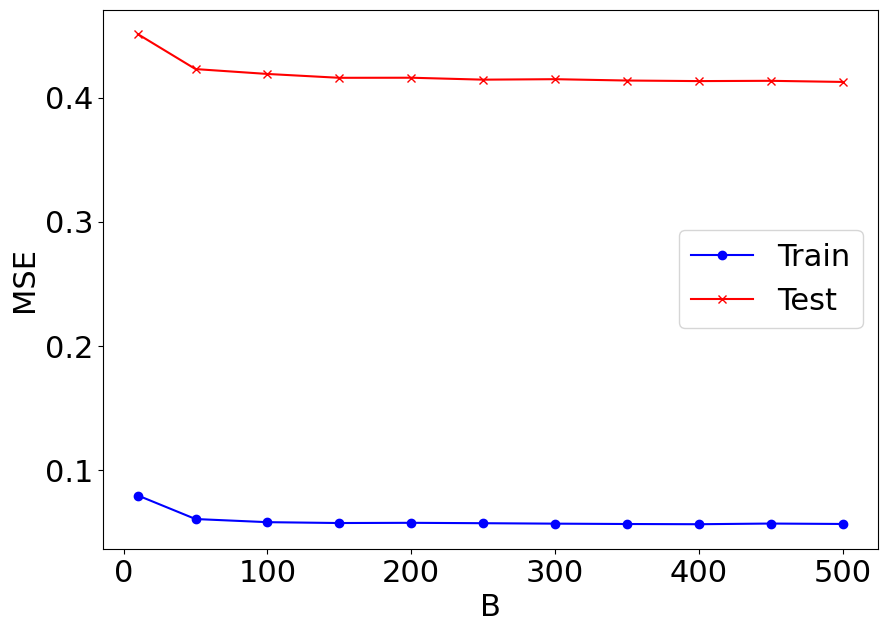

In [34]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(B, mse_train_list, "b", marker = "o", label = "Train")
ax.plot(B, mse_test_list, "r", marker = "x", label = "Test")

ax.set_xlabel("B")
ax.set_ylabel("MSE")
plt.legend()
plt.show()

Makin besar nilai B, model tidak akan overfit.
Pemilihan model terbaik tidak dilakukan dengan melihat performa test, namun dengan melihat performa CV.

With Sklearn

In [35]:
from sklearn.ensemble import BaggingRegressor

In [36]:
# Base estimator
tree = DecisionTreeRegressor()

# Buat Bagging
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = 10,
                                random_state = 123)

# Fit bagging
bagging_tree.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=123)

In [37]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"MSE Train :{mse_train:.4f}")

MSE Train :0.0805


### Lakukan gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor()
bagging_tree = BaggingRegressor(base_estimator = tree,
                                random_state = 123)

bagging_cv = GridSearchCV(estimator = bagging_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_squared_error")

In [40]:
# Fit grid search cv
bagging_cv.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_squared_error')

In [41]:
# Best params
bagging_cv.best_params_

{'n_estimators': 500}

In [42]:
# Refit the bagging tree
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = bagging_cv.best_params_["n_estimators"],
                                random_state = 123)

bagging_tree.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=500,
                 random_state=123)

In [43]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mse_train_bg = mean_squared_error(y_train, y_pred_train)
mse_cv_bg = -bagging_cv.best_score_

print(f"MSE Train :{mse_train_bg:.4f}")
print(f"MSE CV    :{mse_cv_bg:.4f}")

MSE Train :0.0563
MSE CV    :0.4169


## Random Forest Method
1. Membuat 𝐵-sampel bootstrap
2. Menentukan 𝑝 fitur yang digunakan untuk membuat model Decision Tree
3. Membuat 𝐵-model decision tree untuk masing-masing sampel
4. Setiap model melakukan prediksi.
5. Melakukan agregasi dari setiap hasil prediksi.
  * Regresi menggunakan rata-rata
  * Klasifikasi menggunakan majority vote

With sklearn

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

In [46]:
# Fit random forest
rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [47]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)
y_pred_test = rf_tree.predict(X_test_clean)

# MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test

(0.05649082796436264, 0.4055822143929304)

Lakukan gridsearch

In [48]:
params = {"n_estimators": B,
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_squared_error")

In [49]:
# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_squared_error')

In [50]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 450}

In [51]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=450, random_state=123)

In [52]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# MSE
mse_train_rf = mean_squared_error(y_train, y_pred_train)
mse_cv_rf = -rf_tree_cv.best_score_

print(f"MSE Train :{mse_train_rf:.4f}")
print(f"MSE CV    :{mse_cv_rf:.4f}")

MSE Train :0.0547
MSE CV    :0.4041


## Adaboost Method
1. Set weight data sama
2. Bootstrap data
3. Buat simple decision tree (Stomps / weak learner) -- decision tree dengan 1 atau 2 split
4. Fit decision tree ke data
5. Predict error dari hasil fitting
6. Atur ulang weight (menggunakan formula di slide)
7. Ulangi kembali langkah 2-6 untuk n-estimators
8. Hasil prediksi adalah jumlah berbobot dari prediksi weak learner yang dikumpulkan

With sklearn

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
# Build random forest
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = 50,
                             random_state = 123)

In [55]:
# Fit random forest
ada_tree.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=123)

In [56]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)
y_pred_test = ada_tree.predict(X_test_clean)

# MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test

(0.6855761244114164, 0.6900082084643462)

Lakukan gridsearch

In [57]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             random_state = 123)

ada_tree_cv = GridSearchCV(estimator = ada_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_squared_error")

In [58]:
# Fit grid search cv
ada_tree_cv.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_squared_error')

In [59]:
# Best params
ada_tree_cv.best_params_

{'n_estimators': 10}

In [60]:
# Refit the Adaboost
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = ada_tree_cv.best_params_["n_estimators"],
                             random_state = 123)

ada_tree.fit(X_train_clean, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=10, random_state=123)

In [61]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)

# MSE
mse_train_ab = mean_squared_error(y_train, y_pred_train)
mse_cv_ab = -ada_tree_cv.best_score_

print(f"MSE Train :{mse_train_ab:.4f}")
print(f"MSE CV    :{mse_cv_ab:.4f}")

MSE Train :0.6372
MSE CV    :0.6271


## Better Version of Boosting - Gradient Boosting Method

With sklearn

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [64]:
# Fit random forest
grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(random_state=123)

In [65]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)
y_pred_test = grad_tree.predict(X_test_clean)

# MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mse_train, mse_test

(0.3812011047149621, 0.4127659992075644)

Lakukan gridsearch

In [66]:
params = {"n_estimators": B}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_squared_error")

In [67]:
# Fit grid search cv
grad_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_squared_error')

In [68]:
# Best params
grad_tree_cv.best_params_

{'n_estimators': 250}

In [69]:
# Refit the Adaboost
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(n_estimators=250, random_state=123)

In [70]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)

# MSE
mse_train_gb = mean_squared_error(y_train, y_pred_train)
mse_cv_gb = -grad_tree_cv.best_score_

print(f"MSE Train :{mse_train_gb:.4f}")
print(f"MSE CV    :{mse_cv_gb:.4f}")

MSE Train :0.3504
MSE CV    :0.4148


## Comparison

In [74]:
mse_train = [mae_train_dt, mse_train_bg, mse_train_rf, mse_train_ab, mse_train_gb]
mse_cv = [mae_cv_dt, mse_cv_bg, mse_cv_rf, mse_cv_ab, mse_cv_gb]
indexes = ["decision tree", "bagging", "random forest", "adaBoost", "gradientBoost"]

summary_df = pd.DataFrame({"MSE Train": mse_train,
                           "MSE CV": mse_cv},
                          index = indexes)
summary_df

,MSE Train,MSE CV
decision tree,0.465603,0.500724
bagging,0.056293,0.416890
random forest,0.054658,0.404143
adaBoost,0.637184,0.627129
gradientBoost,0.350366,0.414793


## Best Model
Gradient Boosting

In [76]:
# Predict MSE
y_pred_test = grad_tree.predict(X_test_clean)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_test, mae_test_baseline

(0.4053294801505663, 0.9136917868018702)